# Heart Valve Sound Isolation and Noise Reduction

In this notebook, we will process an audio file to isolate clicking sounds and reduce background noise. The steps include applying a high-pass filter, detecting transient clicks, and performing noise reduction using spectral gating.

---

## Step 1: Import Required Libraries

In this step, we import the necessary libraries: `librosa` for audio processing, `scipy` for filtering, `soundfile` for saving the audio, and `matplotlib` for visualization.


In [2]:
# Step 1: Import Required Libraries
import os
import numpy as np
import librosa
import librosa.display
import scipy.signal
import soundfile as sf
import matplotlib.pyplot as plt

## Step 2: Load the Audio File

We use `librosa.load` to load the audio file and get the audio time series and sample rate.

In [36]:
# Step 2: Load the Audio File
input_file_path = 'C:/Users/dasar/Desktop/Artificial Heart Valve Blood Clot Sound Analysis/audio_files/unprocessed_audio/9_6_24 Oven Test 1'  # Specify the path to your audio file
output_file_path = 'C:/Users/dasar/Desktop/Artificial Heart Valve Blood Clot Sound Analysis/audio_files/processed_audio' # Specify the path for the cleaned output

# Extract the file name
input_file_name = os.path.splitext(os.path.basename(input_file_path))[0]

# Define the output path by appending "_cleaned" to the file name
output_file_name = f"{input_file_name}_cleaned.wav"
output_file_path = os.path.join(output_file_path, output_file_name)

# Display basic information about the audio
print(f"Sample rate: {sample_rate} Hz")
print(f"Audio duration: {librosa.get_duration(y=audio_data, sr=sample_rate):.2f} seconds")


Sample rate: 44100 Hz
Audio duration: 62.74 seconds


## Step 3: Apply a High-Pass Filter

We apply a high-pass filter to remove low-frequency background noise and isolate the high-frequency clicks.


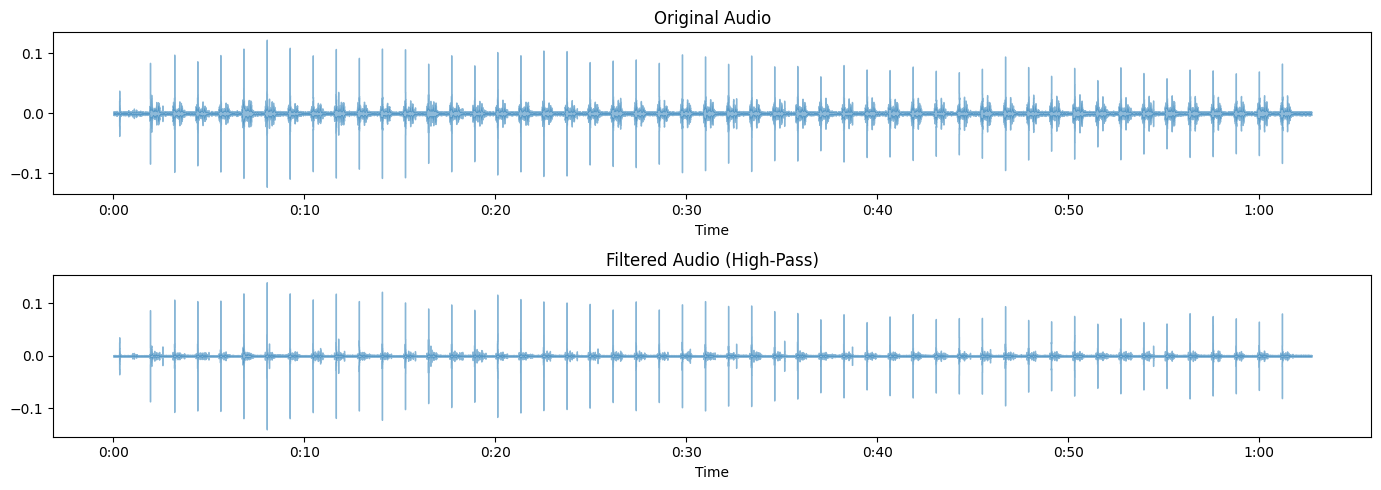

In [37]:
# Step 3: Apply High-Pass Filter
def high_pass_filter(audio_data, sample_rate, cutoff=1000, order=6):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff / nyquist
    sos = scipy.signal.butter(order, normal_cutoff, btype='high', analog=False, output='sos')
    filtered_audio = scipy.signal.sosfilt(sos, audio_data)
    return filtered_audio

# Apply high-pass filter with a cutoff of 1000 Hz
filtered_audio = high_pass_filter(audio_data, sample_rate, cutoff=1000)

# Plot the original and filtered audio
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio_data, sr=sample_rate, alpha=0.5)
plt.title('Original Audio')
plt.subplot(2, 1, 2)
librosa.display.waveshow(filtered_audio, sr=sample_rate, alpha=0.5)
plt.title('Filtered Audio (High-Pass)')
plt.tight_layout()
plt.show()


## Step 4: Detect Transients (Clicks)

We will use **librosa's** trimming function to detect and isolate the loudest parts of the audio, which correspond to clicks.


In [38]:
# Step 4: Detect Transients (Clicks)
clicks, _ = librosa.effects.trim(filtered_audio, top_db=30)


## Step 5: Noise Reduction Using Spectral Gating

We reduce background noise using spectral gating. First, we extract a noise sample from the first second of the audio, compute its power spectrum, and subtract it from the audio's spectrum.


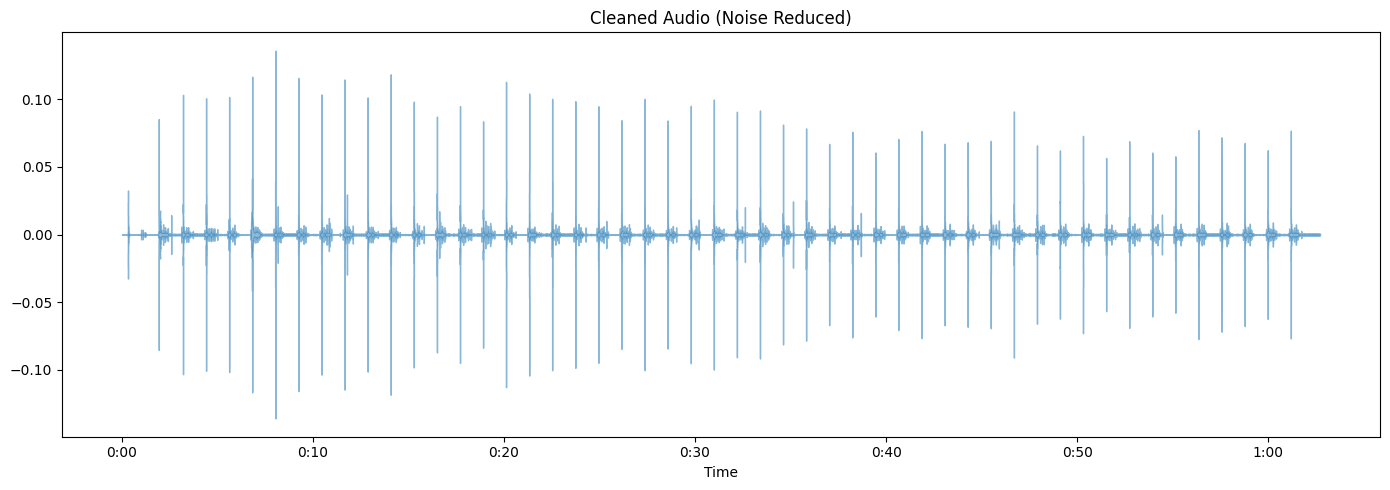

In [39]:
# Step 5: Noise Reduction with Spectral Gating
# Extract background noise from the first second of the filtered audio
noise_sample = filtered_audio[:sample_rate]  # First second as noise sample

# Compute the noise power spectrum
noise_stft = librosa.stft(noise_sample)
noise_power = np.abs(noise_stft).mean(axis=1)

# Compute the power spectrum of the filtered audio
audio_stft = librosa.stft(filtered_audio)
audio_power = np.abs(audio_stft)

# Subtract the noise power spectrum from the audio spectrum
cleaned_power = np.maximum(audio_power - noise_power[:, None], 0)

# Reconstruct the cleaned audio using the inverse STFT
cleaned_audio = librosa.istft(cleaned_power * np.exp(1j * np.angle(audio_stft)))

# Plot the cleaned audio
plt.figure(figsize=(14, 5))
librosa.display.waveshow(cleaned_audio, sr=sample_rate, alpha=0.5)
plt.title('Cleaned Audio (Noise Reduced)')
plt.tight_layout()
plt.show()


## Step 6: Save the Cleaned Audio

Finally, we use `soundfile.write` to save the cleaned audio to a new WAV file.


In [40]:
# Step 6: Save Cleaned Audio
sf.write(output_file_path, cleaned_audio, sample_rate)

print(f"Cleaned audio saved at: {output_file_path}") # Name it appropiately

Cleaned audio saved at: C:/Users/dasar/Desktop/Artificial Heart Valve Blood Clot Sound Analysis/audio_files/processed_audio\9_6_24 Oven Test 1_cleaned.wav
